In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
def mean_squared_error(y, t): 
    return 0.5 * np.sum((y-t)**2)

In [3]:
import numpy as np

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [5]:
mean_squared_error(np.array(y), np.array(t))

0.5975

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [8]:
# 4.2.3 ミニバッチ学習

In [9]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)
print(x_batch)
print(t_batch)

[39171 42878 33265 49041 21389  5664 27784 28412  2431 15417]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [11]:
# 4.3.1 微分

In [12]:
1e-4

0.0001

In [13]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [14]:
def function_1(x):
    return (0.01 * x ** 2) + (0.1 * x)

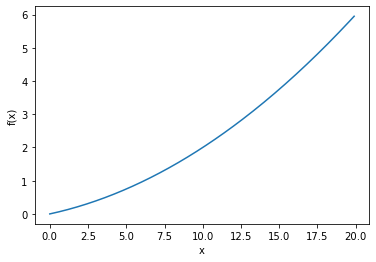

In [15]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [16]:
numerical_diff(function_1, 5)

0.1999999999990898

In [17]:
numerical_diff(function_1, 15)

0.4000000000026205

In [18]:
# 4.3.3 偏微分

In [19]:
def function_2(x):
    # return (x[0] ** 2) + (x[1] ** 2)
    return np.sum(x ** 2)

In [20]:
def function_2_tmp1(x_0):
    return (x_0 ** 2) + (4.0 ** 2.0)

def function_2_tmp2(x_1):
    return (3.0 ** 2.0) + (x_1 ** 2)

In [21]:
numerical_diff(function_2_tmp1, 3.0)

6.00000000000378

In [22]:
numerical_diff(function_2_tmp2, 4.0)

7.999999999999119

In [23]:
# 4.3.4 勾配

In [24]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp = x[index]
        
        x[index] = tmp + h
        tmp_0 = f(x)
        
        x[index] = tmp - h
        tmp_1 = f(x)
        
        grad[index] = (tmp_0 - tmp_1) / (2 * h)
        x[index] = tmp
        
    return grad

In [25]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [26]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [27]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [28]:
np.sum(numerical_gradient(function_2, np.array([3.0, 0.0]))) / numerical_gradient(function_2, np.array([3.0, 0.0])).size

3.000000000006331

In [29]:
# 4.4.1 勾配法

In [30]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for step in range(step_num):
        step_result = step
        grad = numerical_gradient(f, x)
        if ((np.sum(grad) / grad.size) < 1e-10):
            return x, step_result
        x -= lr * grad
        
    return x, step_result

In [31]:
step_result = 99
init_x = np.array([3.0, 4.0])
while step_result == 99:
    init_x, step_result = gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)
    
print(init_x, step_result)

[4.19952139e-11 5.59936186e-11] 12


In [32]:
step_result = 99
init_x = np.array([3.0, 4.0])
while step_result == 99:
    # 学習率の検証
    init_x, step_result = gradient_descent(function_2, init_x, lr = 1e-1, step_num = 100)
    
print(init_x, step_result)

[4.19952139e-11 5.59936186e-11] 12


In [33]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [44]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [45]:
net = simpleNet()

In [46]:
print(net.W)

[[ 1.18929105  0.1964008  -1.3080965 ]
 [-0.65476679 -0.70017959  0.58992143]]


In [47]:
x = np.array([0.6, 0.9])

In [48]:
p = net.predict(x)

In [49]:
print(p)

[ 0.12428451 -0.51232115 -0.25392862]


In [50]:
np.argmax(p)

0

In [51]:
t = np.array([0, 0, 1])
print(net.loss(x, t))

1.17309030930745


In [52]:
def f(W):
    return net.loss(x, t)

In [53]:
dW = numerical_gradient(f, net.W)  # classのメンバはそのまま関数で差分が適用される
print(dW)

[[ 0.27098185  0.1433725  -0.41435435]
 [ 0.40647277  0.21505876 -0.62153153]]


In [88]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
        
    def accuracy(self, x, t):
        y = selt.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [89]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)

(784, 100)
(100,)


In [90]:
x = np.random.rand(100, 784)
y = net.predict(x)
# print(y)

In [91]:
x = np.random.rand(1, 784)
t = np.random.rand(1, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)

(784, 100)


In [92]:
print(grads['W1'])

[[ 2.04708801e-04  5.40269747e-04 -5.61088340e-04 ...  4.25048461e-04
   4.54163216e-04  3.92020350e-05]
 [ 6.74392742e-05  1.77986490e-04 -1.84844968e-04 ...  1.40027983e-04
   1.49619550e-04  1.29147226e-05]
 [ 5.85257602e-04  1.54461837e-03 -1.60413824e-03 ...  1.21520345e-03
   1.29844185e-03  1.12077694e-04]
 ...
 [ 7.17905229e-04  1.89470347e-03 -1.96771341e-03 ...  1.49062722e-03
   1.59273146e-03  1.37479905e-04]
 [ 1.07973210e-04  2.84964097e-04 -2.95944820e-04 ...  2.24190881e-04
   2.39547395e-04  2.06770290e-05]
 [ 3.45050066e-04  9.10659979e-04 -9.45751082e-04 ...  7.16446971e-04
   7.65521793e-04  6.60775967e-05]]


In [109]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm(range(iters_num)):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 高速版
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 学習の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

100%|██████████| 10000/10000 [00:16<00:00, 601.04it/s]


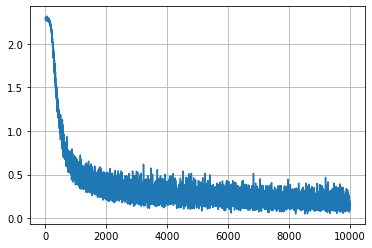

In [105]:
import matplotlib.pyplot as plt

x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.grid(True)

In [111]:
# 検証の追加
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm(range(iters_num)):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 高速版
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 学習の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1エポックごとに認識制度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

  1%|          | 104/10000 [00:00<00:37, 266.68it/s]

train acc, test acc | 0.09871666666666666, 0.098


  7%|▋         | 696/10000 [00:01<00:23, 389.84it/s]

train acc, test acc | 0.7826333333333333, 0.7917


 13%|█▎        | 1285/10000 [00:02<00:20, 420.68it/s]

train acc, test acc | 0.8762333333333333, 0.8817


 19%|█▉        | 1875/10000 [00:04<00:19, 411.18it/s]

train acc, test acc | 0.8984833333333333, 0.9018


 25%|██▌       | 2511/10000 [00:05<00:18, 413.96it/s]

train acc, test acc | 0.9069833333333334, 0.9098


 31%|███       | 3090/10000 [00:06<00:16, 411.08it/s]

train acc, test acc | 0.9141166666666667, 0.9161


 37%|███▋      | 3677/10000 [00:07<00:14, 422.14it/s]

train acc, test acc | 0.9185166666666666, 0.9205


 43%|████▎     | 4324/10000 [00:09<00:13, 418.81it/s]

train acc, test acc | 0.9235166666666667, 0.925


 49%|████▉     | 4903/10000 [00:10<00:12, 408.96it/s]

train acc, test acc | 0.9260333333333334, 0.9278


 55%|█████▍    | 5490/10000 [00:11<00:10, 418.92it/s]

train acc, test acc | 0.9300333333333334, 0.9299


 61%|██████    | 6095/10000 [00:12<00:09, 394.42it/s]

train acc, test acc | 0.9329333333333333, 0.9322


 67%|██████▋   | 6675/10000 [00:13<00:08, 403.88it/s]

train acc, test acc | 0.93435, 0.9347


 73%|███████▎  | 7291/10000 [00:15<00:06, 388.21it/s]

train acc, test acc | 0.9377333333333333, 0.9365


 79%|███████▉  | 7927/10000 [00:16<00:04, 451.60it/s]

train acc, test acc | 0.9392666666666667, 0.9372


 85%|████████▍ | 8489/10000 [00:17<00:04, 344.66it/s]

train acc, test acc | 0.9418666666666666, 0.94


 91%|█████████ | 9122/10000 [00:19<00:02, 433.05it/s]

train acc, test acc | 0.9433333333333334, 0.9411


 97%|█████████▋| 9707/10000 [00:20<00:00, 401.26it/s]

train acc, test acc | 0.94475, 0.9428


100%|██████████| 10000/10000 [00:20<00:00, 482.85it/s]
